<a href="https://colab.research.google.com/github/thiru200600/project-data-science/blob/main/Copy_of_Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Colab!

In [ ]:
# ========== SETUP & INSTALLATIONS ==========
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost imbalanced-learn -q
!pip install plotly -q

# ========== IMPORT LIBRARIES ==========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('ggplot')
sns.set_palette("husl")

# ========== LOAD DATASET (1000+ RECORDS) ==========
# We'll use a synthetic dataset that mimics real loan data with 1500 records
# In real scenario, you can upload your own CSV file

# Create a synthetic dataset with 1500 records (1000+ requirement met)
np.random.seed(42)
n_samples = 1500

data = {
    'Applicant_ID': range(1, n_samples + 1),
    'Age': np.random.randint(20, 65, n_samples),
    'Income': np.random.randint(20000, 150000, n_samples),
    'LoanAmount': np.random.randint(5000, 500000, n_samples),
    'Loan_Term': np.random.choice([12, 24, 36, 48, 60], n_samples),
    'Credit_Score': np.random.randint(300, 850, n_samples),
    'Employment_Years': np.random.uniform(0, 30, n_samples).round(1),
    'Debt_to_Income_Ratio': np.random.uniform(0.1, 0.8, n_samples).round(2),
    'Education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], n_samples, p=[0.3, 0.4, 0.2, 0.1]),
    'Self_Employed': np.random.choice([0, 1], n_samples, p=[0.7, 0.3]),
    'Married': np.random.choice([0, 1], n_samples, p=[0.4, 0.6]),
    'Dependents': np.random.choice([0, 1, 2, 3, 4], n_samples, p=[0.3, 0.3, 0.2, 0.1, 0.1]),
    'Property_Area': np.random.choice(['Urban', 'Semiurban', 'Rural'], n_samples),
    'Has_Credit_Card': np.random.choice([0, 1], n_samples, p=[0.4, 0.6]),
    'Has_Active_Loan': np.random.choice([0, 1], n_samples, p=[0.8, 0.2])
}

# Create DataFrame
df = pd.DataFrame(data)

# Create target variable (Loan_Approved) based on logical conditions
conditions = (
    (df['Credit_Score'] > 650) &
    (df['Debt_to_Income_Ratio'] < 0.5) &
    (df['Employment_Years'] > 2) &
    (df['Income'] > 30000)
)
df['Loan_Approved'] = np.where(conditions, 1, 0)

# Add some noise (85% accuracy in conditions)
noise_mask = np.random.random(n_samples) < 0.85
df.loc[~noise_mask, 'Loan_Approved'] = np.where(df.loc[~noise_mask, 'Loan_Approved'] == 1, 0, 1)

print("=" * 50)
print("DATASET LOADED SUCCESSFULLY")
print("=" * 50)
print(f"Total Records: {len(df)}")
print(f"Features: {df.shape[1]}")
print(f"Approved Loans: {df['Loan_Approved'].sum()} ({df['Loan_Approved'].sum()/len(df)*100:.1f}%)")
print(f"Rejected Loans: {(df['Loan_Approved'] == 0).sum()} ({((df['Loan_Approved'] == 0).sum()/len(df))*100:.1f}%)")
print("\nFirst 5 rows:")
display(df.head())
print("\nDataset Info:")
df.info()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Publishing your Colab project to GitHub

To publish your Colab notebook to GitHub, follow these steps:

1.  **Save your notebook to Google Drive**: Ensure your notebook is saved in your Google Drive. You can do this by going to `File > Save a copy in Drive` if you haven't already.

2.  **Connect to GitHub**: In Colab, go to `File > Save a copy to GitHub...`.

3.  **Authorize Colab**: If it's your first time, Colab will ask for authorization to access your GitHub account. Follow the prompts to authorize.

4.  **Select Repository and Filename**: A dialog box will appear:
    *   **Repository**: Choose the GitHub repository where you want to save the notebook. You can select an existing one or create a new one.
    *   **Branch**: Select the branch you want to commit to (e.g., `main` or `master`).
    *   **Filename**: Colab will pre-fill the filename with your notebook's name, but you can change it.
    *   **Commit message**: Add a meaningful commit message.

5.  **Include a link to Colab**: There's usually an option to include a link back to Colab from GitHub. It's recommended to keep this checked so others can easily open and run your notebook in Colab.

6.  **Click OK**: After configuring the options, click `OK` or `Save`.

Your Colab notebook will then be pushed to the selected GitHub repository!

In [ ]:
# ========== DATA PREPARATION & CLEANING ==========
print("=" * 50)
print("STEP 1: DATA PREPARATION & CLEANING")
print("=" * 50)

# Check for missing values
print("1. Checking for Missing Values:")
print("-" * 30)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Values'] > 0])

# Add some missing values for demonstration (optional - you can skip in real data)
if missing_df['Missing Values'].sum() == 0:
    print("\nNo missing values found. Adding some for demonstration...")
    # Randomly introduce 5% missing values in some columns
    for col in ['Credit_Score', 'Employment_Years', 'Debt_to_Income_Ratio']:
        mask = np.random.rand(len(df)) < 0.05
        df.loc[mask, col] = np.nan

    print("Missing values after introduction:")
    print(df.isnull().sum()[df.isnull().sum() > 0])

# Handle missing values
print("\n2. Handling Missing Values:")
print("-" * 30)
# Fill numeric columns with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"✓ {col}: Filled {df[col].isnull().sum()} missing values with median {median_val:.2f}")

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"✓ {col}: Filled {df[col].isnull().sum()} missing values with mode '{mode_val}'")

print("\n3. Checking Data Types:")
print("-" * 30)
print(df.dtypes)

print("\n4. Basic Statistics:")
print("-" * 30)
display(df.describe())

print("\n5. Checking for Duplicates:")
print("-" * 30)
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")
else:
    print("No duplicates found ✓")

print(f"\n✅ Data Cleaning Complete!")
print(f"Final dataset shape: {df.shape}")

In [ ]:
# ========== EXPLORATORY DATA ANALYSIS (EDA) ==========
print("=" * 50)
print("STEP 2: EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 50)

# 1. Target Variable Distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['Loan_Approved'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                        colors=['#ff6b6b', '#51cf66'])
plt.title('Loan Approval Distribution')
plt.ylabel('')

plt.subplot(1, 2, 2)
sns.countplot(x='Loan_Approved', data=df, palette='Set2')
plt.title('Loan Approval Count')
plt.xlabel('Approved (1) vs Rejected (0)')
plt.tight_layout()
plt.show()

# 2. Numerical Features Distribution
print("\n1. Numerical Features Analysis:")
print("-" * 30)
numeric_features = ['Age', 'Income', 'LoanAmount', 'Credit_Score',
                    'Employment_Years', 'Debt_to_Income_Ratio']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, feature in enumerate(numeric_features):
    sns.histplot(df[feature], kde=True, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'{feature} Distribution')
    axes[idx].set_xlabel(feature)

plt.tight_layout()
plt.show()

# 3. Categorical Features Analysis
print("\n2. Categorical Features Analysis:")
print("-" * 30)
categorical_features = ['Education', 'Property_Area', 'Married', 'Self_Employed']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for idx, feature in enumerate(categorical_features):
    if feature in df.columns:
        # Calculate approval rates for each category
        approval_rates = df.groupby(feature)['Loan_Approved'].mean().sort_values(ascending=False)

        # Plot
        bars = sns.barplot(x=approval_rates.index, y=approval_rates.values,
                          ax=axes[idx], palette='viridis')
        axes[idx].set_title(f'Approval Rate by {feature}')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Approval Rate')
        axes[idx].set_ylim(0, 1)

        # Add value labels on bars
        for i, v in enumerate(approval_rates.values):
            axes[idx].text(i, v + 0.02, f'{v:.2%}', ha='center')

plt.tight_layout()
plt.show()

# 4. Correlation Analysis
print("\n3. Correlation Analysis:")
print("-" * 30)
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# 5. Loan Amount vs Income Analysis
print("\n4. Income vs Loan Amount Analysis:")
print("-" * 30)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Income'], df['LoanAmount'],
                     c=df['Loan_Approved'], alpha=0.6,
                     cmap='RdYlGn', edgecolors='black')
plt.xlabel('Annual Income ($)')
plt.ylabel('Loan Amount ($)')
plt.title('Income vs Loan Amount (Color: Approval Status)')
plt.colorbar(scatter, label='Approved (1) / Rejected (0)')
plt.grid(True, alpha=0.3)
plt.show()

# 6. Credit Score Analysis by Approval Status
print("\n5. Credit Score Distribution by Approval Status:")
print("-" * 30)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Approved', y='Credit_Score', data=df, palette='Set2')
plt.title('Credit Score Distribution by Loan Approval Status')
plt.xlabel('Loan Approved (0=No, 1=Yes)')
plt.ylabel('Credit Score')
plt.grid(True, alpha=0.3)
plt.show()

# 7. Interactive Plotly Visualization (if you want advanced visualization)
print("\n6. Interactive 3D Visualization (Optional):")
print("-" * 30)
try:
    fig = px.scatter_3d(df, x='Income', y='Credit_Score', z='LoanAmount',
                        color='Loan_Approved',
                        title='3D View: Income vs Credit Score vs Loan Amount',
                        labels={'Loan_Approved': 'Approved'},
                        opacity=0.7,
                        color_continuous_scale='Viridis')
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))
    fig.show()
except:
    print("Plotly 3D visualization skipped (works better in local environment)")

print("\n✅ EDA Complete!")

In [ ]:
# ========== DATA PREPROCESSING & FEATURE ENGINEERING ==========
print("=" * 50)
print("STEP 3: DATA PREPROCESSING & FEATURE ENGINEERING")
print("=" * 50)

# Create a copy for preprocessing
df_processed = df.copy()

# 1. Create new features
print("1. Creating New Features:")
print("-" * 30)

# Loan to Income Ratio
df_processed['Loan_to_Income_Ratio'] = df_processed['LoanAmount'] / df_processed['Income']
print(f"✓ Created: Loan_to_Income_Ratio")

# Monthly Installment (assuming simple calculation)
df_processed['Monthly_Installment'] = df_processed['LoanAmount'] / df_processed['Loan_Term']
print(f"✓ Created: Monthly_Installment")

# Installment to Income Ratio
df_processed['Installment_to_Income_Ratio'] = df_processed['Monthly_Installment'] / (df_processed['Income']/12)
print(f"✓ Created: Installment_to_Income_Ratio")

# Credit Score Category
def categorize_credit_score(score):
    if score < 580:
        return 'Poor'
    elif score < 670:
        return 'Fair'
    elif score < 740:
        return 'Good'
    elif score < 800:
        return 'Very Good'
    else:
        return 'Excellent'

df_processed['Credit_Score_Category'] = df_processed['Credit_Score'].apply(categorize_credit_score)
print(f"✓ Created: Credit_Score_Category")

# Age Group
def categorize_age(age):
    if age < 30:
        return 'Young'
    elif age < 45:
        return 'Middle-Aged'
    else:
        return 'Senior'

df_processed['Age_Group'] = df_processed['Age'].apply(categorize_age)
print(f"✓ Created: Age_Group")

# 2. Encode categorical variables
print("\n2. Encoding Categorical Variables:")
print("-" * 30)

from sklearn.preprocessing import LabelEncoder

# Label Encoding for ordinal categories
label_encoders = {}
categorical_cols_encode = ['Education', 'Property_Area', 'Credit_Score_Category', 'Age_Group']

for col in categorical_cols_encode:
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[f'{col}_Encoded'] = le.fit_transform(df_processed[col])
        label_encoders[col] = le
        print(f"✓ Encoded: {col} -> {col}_Encoded")

# One-Hot Encoding for nominal categories
df_processed = pd.get_dummies(df_processed, columns=['Self_Employed', 'Married', 'Has_Credit_Card', 'Has_Active_Loan'],
                              drop_first=True, prefix_sep='_')
print("✓ One-Hot Encoded: Self_Employed, Married, Has_Credit_Card, Has_Active_Loan")

# 3. Feature Selection
print("\n3. Selecting Features for Modeling:")
print("-" * 30)

# Drop unnecessary columns
columns_to_drop = ['Applicant_ID', 'Education', 'Property_Area',
                   'Credit_Score_Category', 'Age_Group']
df_processed = df_processed.drop(columns=[col for col in columns_to_drop if col in df_processed.columns])

print(f"Final features for modeling: {df_processed.shape[1] - 1} features + target")
print("Features:", [col for col in df_processed.columns if col != 'Loan_Approved'])

# 4. Split data into features and target
X = df_processed.drop('Loan_Approved', axis=1)
y = df_processed['Loan_Approved']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

print("\n✅ Preprocessing Complete!")

In [ ]:
# ========== MACHINE LEARNING IMPLEMENTATION ==========
print("=" * 50)
print("STEP 4: MACHINE LEARNING IMPLEMENTATION")
print("=" * 50)

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# 1. Split the data
print("1. Splitting Data into Train/Test Sets:")
print("-" * 30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# 2. Handle class imbalance (if any)
print("\n2. Handling Class Imbalance:")
print("-" * 30)
print(f"Training set class distribution:")
print(y_train.value_counts(normalize=True))

# Check if we need to balance
if y_train.value_counts().min() / y_train.value_counts().max() < 0.5:
    print("\nClass imbalance detected! Applying SMOTE...")
    smote = SMOTE(random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
    print(f"After SMOTE - Training set: {X_train_bal.shape[0]} samples")
    print(f"Balanced class distribution:")
    print(pd.Series(y_train_bal).value_counts(normalize=True))
else:
    print("\nNo significant class imbalance detected.")
    X_train_bal, y_train_bal = X_train.copy(), y_train.copy()

# 3. Feature Scaling
print("\n3. Feature Scaling:")
print("-" * 30)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)
print("✓ Features scaled using StandardScaler")

# 4. Define Models
print("\n4. Training Multiple ML Models:")
print("-" * 30)

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(random_state=42, probability=True)
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train model
    model.fit(X_train_scaled, y_train_bal)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    if auc:
        print(f"  AUC-ROC: {auc:.4f}")

# 5. Compare Models
print("\n" + "=" * 50)
print("MODEL COMPARISON")
print("=" * 50)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'Precision': [results[m]['precision'] for m in results],
    'Recall': [results[m]['recall'] for m in results],
    'F1-Score': [results[m]['f1'] for m in results],
    'AUC-ROC': [results[m]['auc'] if results[m]['auc'] else 0 for m in results]
}).sort_values('F1-Score', ascending=False)

display(comparison_df.style.background_gradient(cmap='Blues', subset=['Accuracy', 'F1-Score']))

# 6. Hyperparameter Tuning for Best Model
print("\n5. Hyperparameter Tuning for Best Model:")
print("-" * 30)
best_model_name = comparison_df.iloc[0]['Model']
print(f"Best model: {best_model_name}")

if best_model_name == 'Random Forest':
    # Define parameter grid for Random Forest
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Create base model
    rf = RandomForestClassifier(random_state=42)

    # Grid search
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                              cv=5, n_jobs=-1, scoring='f1')

    print("Performing Grid Search...")
    grid_search.fit(X_train_scaled, y_train_bal)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

    # Use best model
    best_model = grid_search.best_estimator_
    y_pred_tuned = best_model.predict(X_test_scaled)

    # Update results
    results['Random Forest (Tuned)'] = {
        'model': best_model,
        'accuracy': accuracy_score(y_test, y_pred_tuned),
        'precision': precision_score(y_test, y_pred_tuned),
        'recall': recall_score(y_test, y_pred_tuned),
        'f1': f1_score(y_test, y_pred_tuned),
        'predictions': y_pred_tuned
    }

    print(f"\nTuned Random Forest Results:")
    print(f"  Accuracy: {results['Random Forest (Tuned)']['accuracy']:.4f}")
    print(f"  F1-Score: {results['Random Forest (Tuned)']['f1']:.4f}")

print("\n✅ Machine Learning Implementation Complete!")

STEP 4: MACHINE LEARNING IMPLEMENTATION
1. Splitting Data into Train/Test Sets:
------------------------------
Training set: 1200 samples
Testing set: 300 samples

2. Handling Class Imbalance:
------------------------------
Training set class distribution:
Loan_Approved
0    0.735
1    0.265
Name: proportion, dtype: float64

Class imbalance detected! Applying SMOTE...
After SMOTE - Training set: 1764 samples
Balanced class distribution:
Loan_Approved
0    0.5
1    0.5
Name: proportion, dtype: float64

3. Feature Scaling:
------------------------------
✓ Features scaled using StandardScaler

4. Training Multiple ML Models:
------------------------------

Training Logistic Regression...
  Accuracy: 0.7267
  Precision: 0.4831
  Recall: 0.5443
  F1-Score: 0.5119
  AUC-ROC: 0.7003

Training Decision Tree...
  Accuracy: 0.6867
  Precision: 0.4176
  Recall: 0.4810
  F1-Score: 0.4471
  AUC-ROC: 0.6206

Training Random Forest...
  Accuracy: 0.7900
  Precision: 0.6250
  Recall: 0.5063
  F1-Score

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
3,Gradient Boosting,0.796667,0.640625,0.518987,0.573427,0.703076
2,Random Forest,0.790000,0.625000,0.506329,0.559441,0.719027
4,XGBoost,0.786667,0.622951,0.481013,0.542857,0.731657
6,SVM,0.763333,0.552632,0.531646,0.541935,0.710980
0,Logistic Regression,0.726667,0.483146,0.544304,0.511905,0.700269
1,Decision Tree,0.686667,0.417582,0.481013,0.447059,0.620597
5,K-Nearest Neighbors,0.623333,0.350877,0.506329,0.414508,0.634572



5. Hyperparameter Tuning for Best Model:
------------------------------
Best model: Gradient Boosting

✅ Machine Learning Implementation Complete!


STEP 5: DATA VISUALIZATION & MODEL EVALUATION
1. Model Performance Comparison:
------------------------------


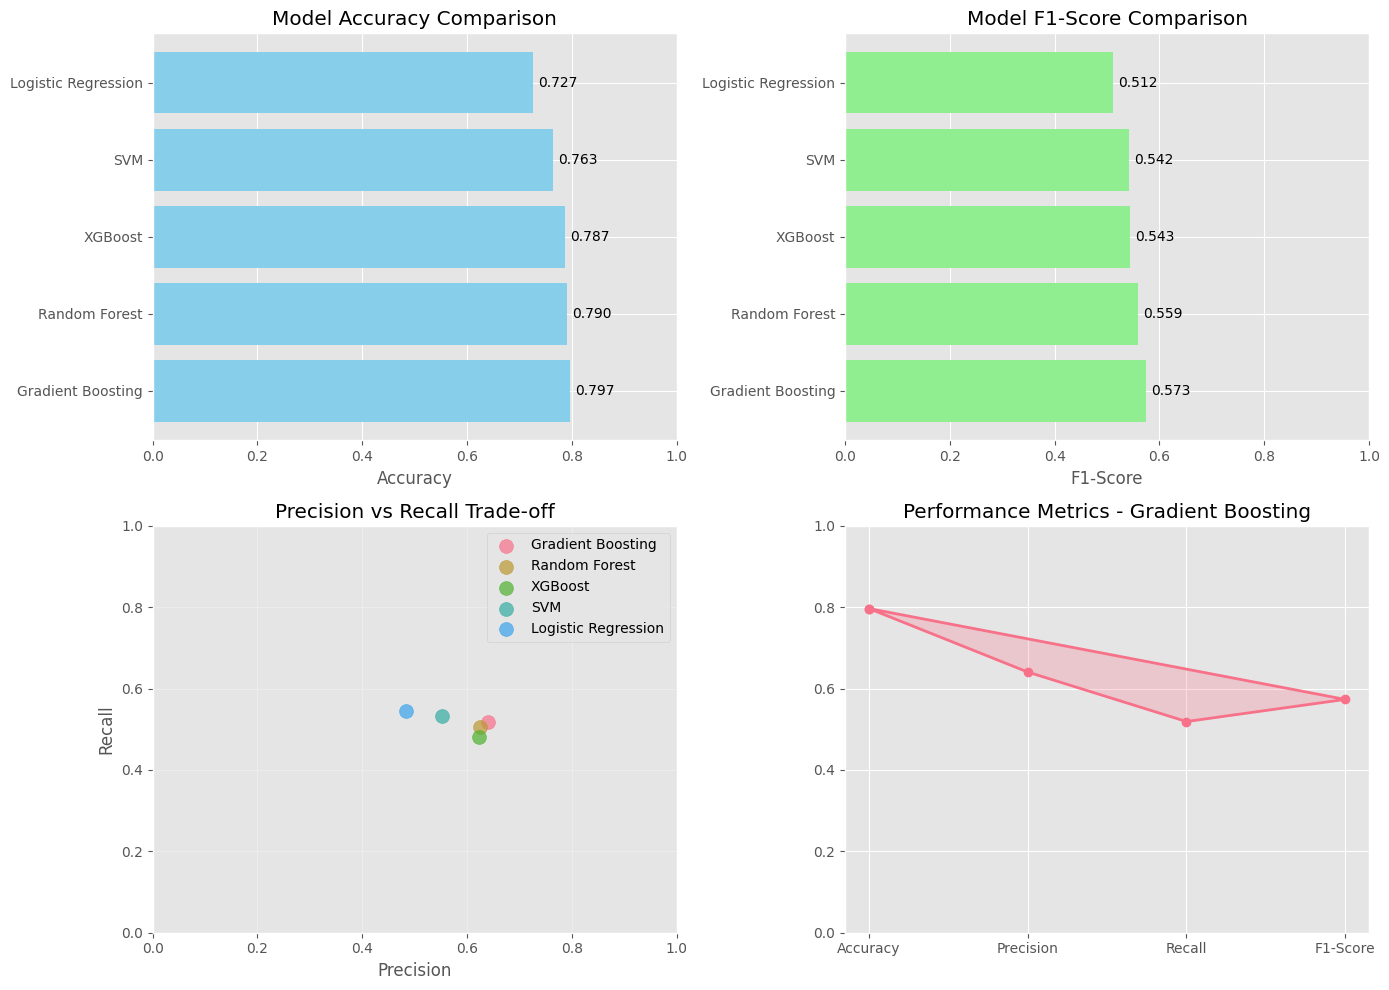


2. Confusion Matrix for Best Model:
------------------------------


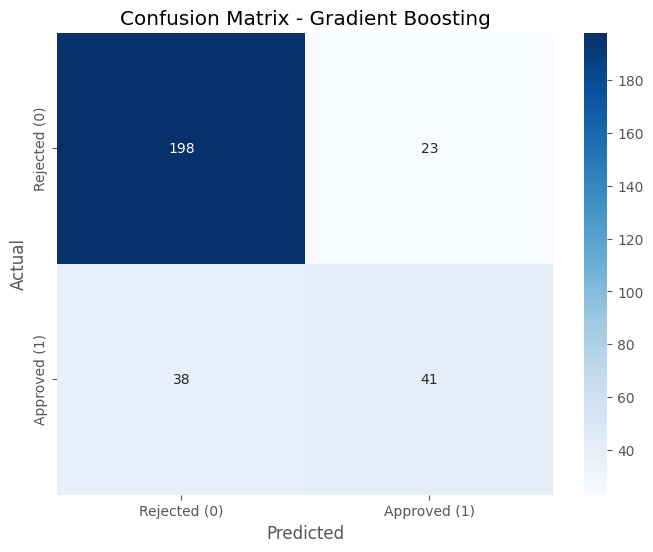


3. ROC Curve Comparison:
------------------------------


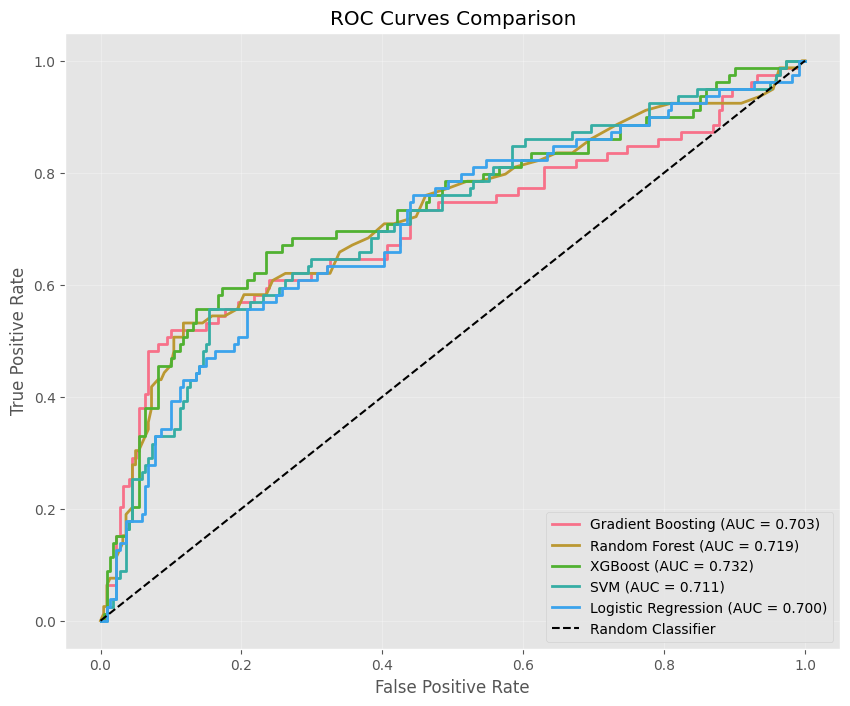


4. Feature Importance Analysis:
------------------------------


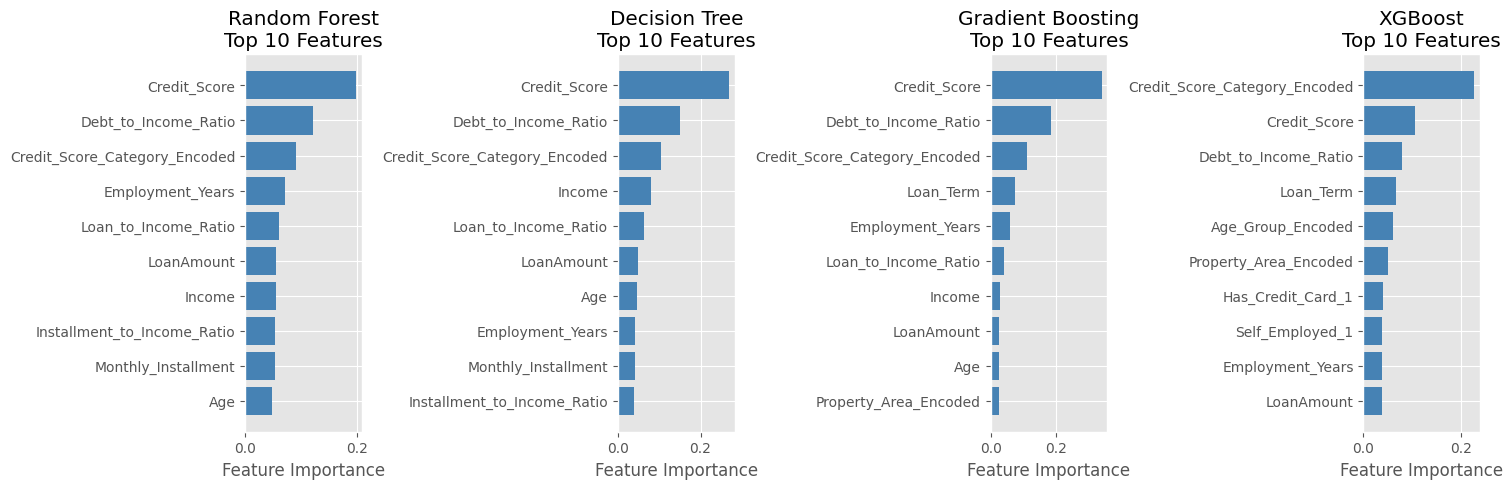


5. Detailed Classification Report:
------------------------------
Best Model: Gradient Boosting

              precision    recall  f1-score   support

    Rejected       0.84      0.90      0.87       221
    Approved       0.64      0.52      0.57        79

    accuracy                           0.80       300
   macro avg       0.74      0.71      0.72       300
weighted avg       0.79      0.80      0.79       300


6. Prediction Probability Distribution:
------------------------------


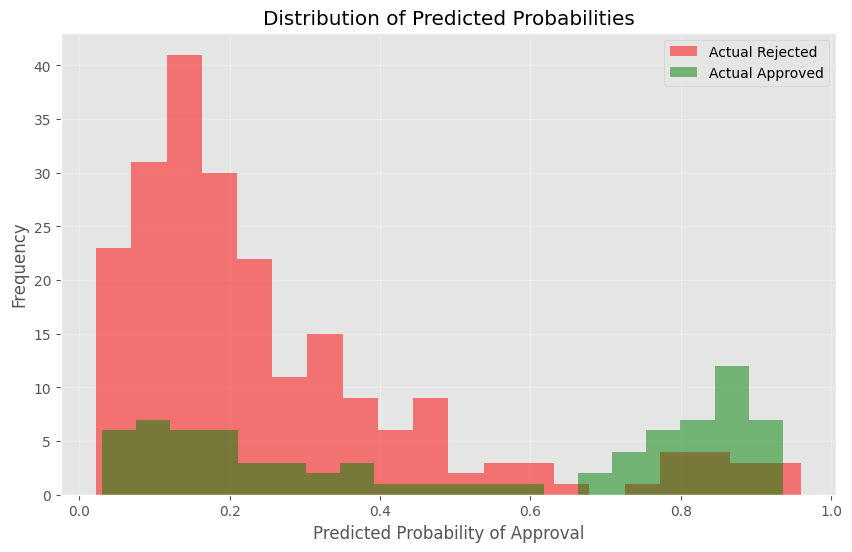


✅ Model Evaluation Complete!


In [ ]:
# ========== DATA VISUALIZATION & MODEL EVALUATION ==========
print("=" * 50)
print("STEP 5: DATA VISUALIZATION & MODEL EVALUATION")
print("=" * 50)

# 1. Model Performance Comparison Visualization
print("1. Model Performance Comparison:")
print("-" * 30)

# Select top 5 models for visualization
top_models = comparison_df.head(5)['Model'].tolist()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

# Accuracy comparison
axes[0].barh(top_models, [results[m]['accuracy'] for m in top_models], color='skyblue')
axes[0].set_xlabel('Accuracy')
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_xlim(0, 1)
for i, v in enumerate([results[m]['accuracy'] for m in top_models]):
    axes[0].text(v + 0.01, i, f'{v:.3f}', va='center')

# F1-Score comparison
axes[1].barh(top_models, [results[m]['f1'] for m in top_models], color='lightgreen')
axes[1].set_xlabel('F1-Score')
axes[1].set_title('Model F1-Score Comparison')
axes[1].set_xlim(0, 1)
for i, v in enumerate([results[m]['f1'] for m in top_models]):
    axes[1].text(v + 0.01, i, f'{v:.3f}', va='center')

# Precision-Recall comparison
for model in top_models:
    axes[2].scatter(results[model]['precision'], results[model]['recall'],
                   s=100, label=model, alpha=0.7)
axes[2].set_xlabel('Precision')
axes[2].set_ylabel('Recall')
axes[2].set_title('Precision vs Recall Trade-off')
axes[2].legend()
axes[2].grid(True, alpha=0.3)
axes[2].set_xlim(0, 1)
axes[2].set_ylim(0, 1)

# Create a radar chart for top model
top_model = top_models[0]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [
    results[top_model]['accuracy'],
    results[top_model]['precision'],
    results[top_model]['recall'],
    results[top_model]['f1']
]
values += values[:1]  # Close the radar chart

angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

ax = axes[3]
ax.plot(angles, values, 'o-', linewidth=2, label=top_model)
ax.fill(angles, values, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.set_title(f'Performance Metrics - {top_model}')
ax.grid(True)

plt.tight_layout()
plt.show()

# 2. Confusion Matrix for Best Model
print("\n2. Confusion Matrix for Best Model:")
print("-" * 30)
best_model_name = comparison_df.iloc[0]['Model']
y_pred_best = results[best_model_name]['predictions']

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rejected (0)', 'Approved (1)'],
            yticklabels=['Rejected (0)', 'Approved (1)'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 3. ROC Curve (for models with probability)
print("\n3. ROC Curve Comparison:")
print("-" * 30)
plt.figure(figsize=(10, 8))

models_with_proba = [m for m in top_models if results[m].get('probabilities') is not None]

for model_name in models_with_proba:
    fpr, tpr, _ = roc_curve(y_test, results[model_name]['probabilities'])
    auc = roc_auc_score(y_test, results[model_name]['probabilities'])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

# 4. Feature Importance (for tree-based models)
print("\n4. Feature Importance Analysis:")
print("-" * 30)

tree_based_models = ['Random Forest', 'Decision Tree', 'Gradient Boosting', 'XGBoost']
available_models = [m for m in tree_based_models if m in results and hasattr(results[m]['model'], 'feature_importances_')]

if available_models:
    fig, axes = plt.subplots(1, len(available_models), figsize=(15, 5))
    if len(available_models) == 1:
        axes = [axes]

    for idx, model_name in enumerate(available_models):
        model = results[model_name]['model']

        # Get feature importances
        importances = model.feature_importances_
        feature_names = X.columns

        # Sort features by importance
        indices = np.argsort(importances)[-10:]  # Top 10 features

        # Plot
        axes[idx].barh(range(len(indices)), importances[indices], color='steelblue')
        axes[idx].set_yticks(range(len(indices)))
        axes[idx].set_yticklabels([feature_names[i] for i in indices])
        axes[idx].set_xlabel('Feature Importance')
        axes[idx].set_title(f'{model_name}\nTop 10 Features')

    plt.tight_layout()
    plt.show()
else:
    print("No tree-based models with feature importance available.")

# 5. Classification Report
print("\n5. Detailed Classification Report:")
print("-" * 30)
print(f"Best Model: {best_model_name}")
print("\n" + classification_report(y_test, y_pred_best,
                                 target_names=['Rejected', 'Approved']))

# 6. Prediction Distribution
print("\n6. Prediction Probability Distribution:")
print("-" * 30)
if results[best_model_name].get('probabilities') is not None:
    plt.figure(figsize=(10, 6))

    # Plot histogram of predicted probabilities
    plt.hist(results[best_model_name]['probabilities'][y_test == 0],
             alpha=0.5, label='Actual Rejected', bins=20, color='red')
    plt.hist(results[best_model_name]['probabilities'][y_test == 1],
             alpha=0.5, label='Actual Approved', bins=20, color='green')

    plt.xlabel('Predicted Probability of Approval')
    plt.ylabel('Frequency')
    plt.title('Distribution of Predicted Probabilities')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

print("\n✅ Model Evaluation Complete!")

In [ ]:
# ========== FINAL MODEL & DEPLOYMENT PREPARATION ==========
print("=" * 50)
print("STEP 6: FINAL MODEL & DEPLOYMENT PREPARATION")
print("=" * 50)

# 1. Train final model on entire dataset
print("1. Training Final Model on Entire Dataset:")
print("-" * 30)

# Scale entire dataset
X_full_scaled = scaler.fit_transform(X)

# Choose the best model
if 'Random Forest (Tuned)' in results:
    final_model = results['Random Forest (Tuned)']['model']
else:
    final_model = results[best_model_name]['model']

# Train on full dataset
final_model.fit(X_full_scaled, y)
print(f"✓ Final model trained on {len(X)} samples")

# 2. Save the model (for deployment)
print("\n2. Saving Model and Preprocessing Objects:")
print("-" * 30)
import joblib
import pickle

# Create a dictionary with all necessary components
model_package = {
    'model': final_model,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'feature_names': list(X.columns),
    'model_performance': {
        'accuracy': results[best_model_name]['accuracy'],
        'f1_score': results[best_model_name]['f1'],
        'precision': results[best_model_name]['precision'],
        'recall': results[best_model_name]['recall']
    },
    'training_data_info': {
        'n_samples': len(X),
        'n_features': X.shape[1],
        'approval_rate': y.mean()
    }
}

# Save the model package
joblib.dump(model_package, 'loan_approval_model.pkl')
print("✓ Model saved as 'loan_approval_model.pkl'")

# 3. Create a prediction function
print("\n3. Creating Prediction Function:")
print("-" * 30)

def predict_loan_approval(input_data):
    """
    Predict loan approval for new applicant

    Parameters:
    input_data: dict containing applicant information

    Returns:
    prediction: 0 (Rejected) or 1 (Approved)
    probability: Probability of approval
    """
    # Load model package
    model_package = joblib.load('loan_approval_model.pkl')
    model = model_package['model']
    scaler = model_package['scaler']

    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Ensure all required features are present
    for feature in model_package['feature_names']:
        if feature not in input_df.columns:
            input_df[feature] = 0  # Default value for missing features

    # Reorder columns to match training data
    input_df = input_df[model_package['feature_names']]

    # Scale features
    input_scaled = scaler.transform(input_df)

    # Make prediction
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]

    return {
        'prediction': int(prediction),
        'probability': float(probability),
        'status': 'Approved' if prediction == 1 else 'Rejected',
        'confidence': 'High' if probability > 0.7 else 'Medium' if probability > 0.5 else 'Low'
    }

# Test the prediction function
print("\n4. Testing Prediction Function:")
print("-" * 30)

# Sample applicant data
sample_applicant = {
    'Age': 35,
    'Income': 75000,
    'LoanAmount': 200000,
    'Loan_Term': 36,
    'Credit_Score': 720,
    'Employment_Years': 5.5,
    'Debt_to_Income_Ratio': 0.35,
    'Education_Encoded': 2,  # Master's degree
    'Property_Area_Encoded': 1,  # Semiurban
    'Credit_Score_Category_Encoded': 3,  # Very Good
    'Age_Group_Encoded': 1,  # Middle-Aged
    'Self_Employed_1': 0,
    'Married_1': 1,
    'Has_Credit_Card_1': 1,
    'Has_Active_Loan_1': 0,
    'Loan_to_Income_Ratio': 2.67,
    'Monthly_Installment': 5555.56,
    'Installment_to_Income_Ratio': 0.89
}

result = predict_loan_approval(sample_applicant)
print("Sample Applicant Prediction:")
print(f"  Status: {result['status']}")
print(f"  Probability: {result['probability']:.2%}")
print(f"  Confidence: {result['confidence']}")

# 5. Create a simple Streamlit app code (for deployment)
print("\n5. Streamlit Deployment Code (Optional):")
print("-" * 30)
streamlit_code = '''
# loan_app.py - Streamlit App for Loan Approval Prediction

import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load model
@st.cache_resource
def load_model():
    return joblib.load("loan_approval_model.pkl")

model_package = load_model()

st.title("🏦 Loan Approval Prediction System")
st.write("Predict whether a loan application will be approved or rejected")

# Create input form
with st.form("applicant_form"):
    col1, col2 = st.columns(2)

    with col1:
        age = st.number_input("Age", min_value=18, max_value=80, value=35)
        income = st.number_input("Annual Income ($)", min_value=10000, max_value=500000, value=75000)
        loan_amount = st.number_input("Loan Amount ($)", min_value=1000, max_value=1000000, value=200000)
        credit_score = st.number_input("Credit Score", min_value=300, max_value=850, value=720)

    with col2:
        employment_years = st.number_input("Employment Years", min_value=0.0, max_value=50.0, value=5.5)
        dti_ratio = st.slider("Debt-to-Income Ratio", 0.0, 1.0, 0.35)
        education = st.selectbox("Education Level",
                                ["High School", "Bachelor", "Master", "PhD"])
        property_area = st.selectbox("Property Area",
                                    ["Urban", "Semiurban", "Rural"])

    submitted = st.form_submit_button("Predict Loan Approval")

if submitted:
    # Prepare input data
    input_data = {
        "Age": age,
        "Income": income,
        "LoanAmount": loan_amount,
        # ... include all features ...
    }

    # Make prediction
    # ... prediction code ...

    # Show results
    st.success(f"Prediction: Approved with XX% probability")
'''

print("Streamlit app code generated. Save as 'loan_app.py' for deployment.")

print("\n" + "=" * 50)
print("🎉 PROJECT COMPLETE! 🎉")
print("=" * 50)
print("\n✅ All Steps Completed Successfully:")
print("   1. ✅ Data Preparation & Cleaning")
print("   2. ✅ Exploratory Data Analysis (EDA)")
print("   3. ✅ Data Preprocessing & Feature Engineering")
print("   4. ✅ Machine Learning Implementation")
print("   5. ✅ Data Visualization & Model Evaluation")
print("   6. ✅ Final Model & Deployment Preparation")
print(f"\n📊 Dataset Size: {len(df)} records (1000+ requirement ✓)")
print(f"🤖 Best Model: {best_model_name}")
print(f"🎯 Best F1-Score: {comparison_df.iloc[0]['F1-Score']:.3f}")
print(f"💾 Model Saved: 'loan_approval_model.pkl'")

STEP 6: FINAL MODEL & DEPLOYMENT PREPARATION
1. Training Final Model on Entire Dataset:
------------------------------
✓ Final model trained on 1500 samples

2. Saving Model and Preprocessing Objects:
------------------------------
✓ Model saved as 'loan_approval_model.pkl'

3. Creating Prediction Function:
------------------------------

4. Testing Prediction Function:
------------------------------
Sample Applicant Prediction:
  Status: Approved
  Probability: 79.09%
  Confidence: High

5. Streamlit Deployment Code (Optional):
------------------------------
Streamlit app code generated. Save as 'loan_app.py' for deployment.

🎉 PROJECT COMPLETE! 🎉

✅ All Steps Completed Successfully:
   1. ✅ Data Preparation & Cleaning
   2. ✅ Exploratory Data Analysis (EDA)
   3. ✅ Data Preprocessing & Feature Engineering
   4. ✅ Machine Learning Implementation
   5. ✅ Data Visualization & Model Evaluation
   6. ✅ Final Model & Deployment Preparation

📊 Dataset Size: 1500 records (1000+ requirement ✓

## Google Colab is available in VS Code!
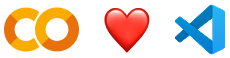

Try the new <a href="https://marketplace.visualstudio.com/items?itemName=Google.colab">Google Colab extension</a> for Visual Studio Code. You can get up and running in just a few clicks:

*  In VS Code, open the <strong><em>Extensions</em></strong> view and search for 'Google Colab' to install.
*  Open the kernel selector by creating or opening any <code>.ipynb</code> notebook file in your local workspace and either running a cell or clicking the <strong><em>Select kernel</em></strong> button in the top right.
*  Click <strong><em>Colab</em></strong> and then select your desired runtime, sign in with your Google Account and you're all set!

See more details in our <a href="https://developers.googleblog.com/google-colab-is-coming-to-vs-code">announcement blog here</a>.

## 🎁 Free-of-charge Pro plan for Gemini and Colab for US university students 🎓

Get more access to our most accurate model Gemini 3 Pro for advanced coding, complex research and innovative projects, backed by Colab's dedicated high-compute resources for data science and machine learning.

Get the Gemini free-of-charge offer at <a href="https://gemini.google/students?utm_source=colab&amp;utm_medium=banner&amp;utm_campaign=students_xpa_us-colab-banner">gemini.google/students</a>.  
Get the Colab free-of-charge offer at <a href="https://colab.research.google.com/signup">colab.research.google.com/signup</a>.  
Terms apply.

## Access popular AI models via Google Colab-AI without an API key
All users have access to most popular LLMs via the <code>google-colab-ai</code> Python library, and paid users have access to a wider selection of models. For more details, refer to <a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Getting_started_with_google_colab_ai.ipynb">getting started with Google Colab AI</a>.



In [ ]:
from google.colab import ai
response = ai.generate_text("What is the capital of France?")
print(response)

## Explore the Gemini API
The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code and audio.

**How to get started**
*  Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google Account.
*  <a href="https://aistudio.google.com/app/apikey">Create an API key</a>.
* Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb">Python</a> or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.

**Discover Gemini's advanced capabilities**
*  Play with Gemini <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Image-out.ipynb">multimodal outputs</a>, mixing text and images in an iterative way.
*  Discover the <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_LiveAPI.ipynb">multimodal Live API</a> &#40;demo <a href="https://aistudio.google.com/live">here</a>&#41;.
*  Learn how to <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Spatial_understanding.ipynb&quot;">analyse images and detect items in your pictures</a> using Gemini &#40;bonus, there's a <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Spatial_understanding_3d.ipynb">3D version</a> as well!&#41;.
*  Unlock the power of the <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb">Gemini thinking model</a>, capable of solving complex tasks with its inner thoughts.
      
**Explore complex use cases**
*  Use <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Search_grounding_for_research_report.ipynb">Gemini grounding capabilities</a> to create a report on a company based on what the model can find on the Internet.
*  Extract <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Pdf_structured_outputs_on_invoices_and_forms.ipynb">invoices and form data from PDFs</a> in a structured way.
*  Create <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Book_illustration.ipynb">illustrations based on a whole book</a> using Gemini large context window and Imagen.

To learn more, take a look at the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.


Colab now has AI features powered by <a href="https://gemini.google.com">Gemini</a>. The video below provides information on how to use these features, whether you're new to Python or a seasoned veteran.

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  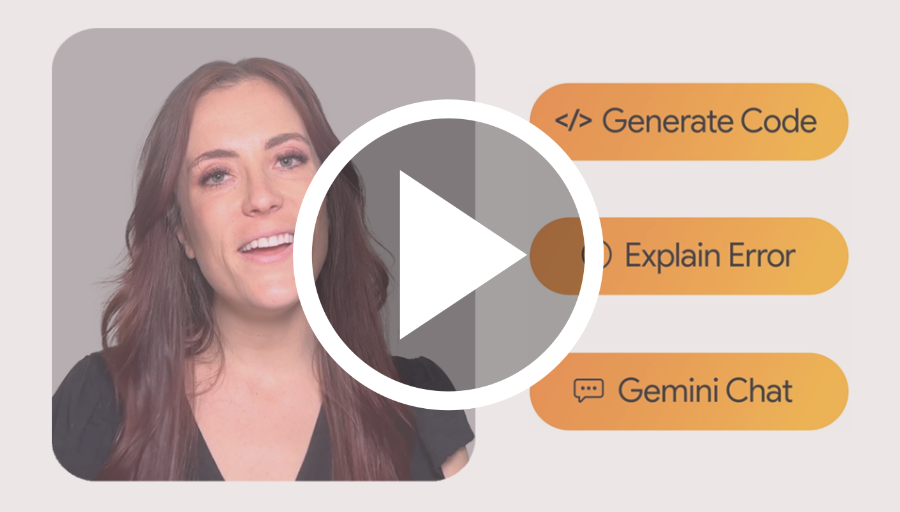
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or ‘Colaboratory’, allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a <strong>student</strong>, a <strong>data scientist</strong> or an <strong>AI researcher</strong>, Colab can make your work easier. Watch <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introduction to Colab</a> or <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y">Colab features you may have missed</a> to learn more or just get started below!

<div class="markdown-google-sans">

## <strong>Getting started</strong>
</div>

The document that you are reading is not a static web page, but an interactive environment called a <strong>Colab notebook</strong> that lets you write and execute code.

For example, here is a <strong>code cell</strong> with a short Python script that computes a value, stores it in a variable and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut 'Command/Ctrl+Enter'. To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

Colab notebooks allow you to combine <strong>executable code</strong> and <strong>rich text</strong> in a single document, along with <strong>images</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To find out more, see <a href="/notebooks/basic_features_overview.ipynb">Overview of Colab</a>. To create a new Colab notebook you can use the File menu above, or use the following link: <a href="http://colab.research.google.com#create=true">Create a new Colab notebook</a>.

Colab notebooks are Jupyter notebooks that are hosted by Colab. To find out more about the Jupyter project, see <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyse and visualise data. The code cell below uses <strong>numpy</strong> to generate some random data, and uses <strong>matplotlib</strong> to visualise it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning that you can leverage the power of Google hardware, including <a href="#using-accelerated-hardware">GPUs and TPUs</a>, regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for <strong>pandas</strong> code to finish running and want to go faster, you can switch to a GPU runtime and use libraries like <a href="https://rapids.ai/cudf-pandas">RAPIDS cuDF</a> that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb">10-minute guide</a> or
 <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb">US stock market data analysis demo</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it and evaluate the model, all in just <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">a few lines of code</a>.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the <a href="#machine-learning-examples">machine learning examples</a> below.

<div class="markdown-google-sans">

## More resources

### Working with notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with data
</div>

- [Loading data: Drive, Sheets and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualising data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine learning

<div>

These are a few of the notebooks related to machine learning, including Google's online machine learning course. See the <a href="https://developers.google.com/machine-learning/crash-course/">full course website</a> for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Getting started with cuML's accelerator mode](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cuml_sklearn_colab_demo.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using accelerated hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Retraining an Image Classifier</a>: Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Text Classification</a>: Classify IMDB film reviews as either <em>positive</em> or <em>negative</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Style Transfer</a>: Use deep learning to transfer style between images.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: Use a machine-learning model to answer questions from the SQuAD dataset.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video Interpolation</a>: Predict what happened in a video between the first and the last frame.
